<a href="https://colab.research.google.com/github/lameckirungu/supply_chain_simulation/blob/grade_prediction_system/428_G6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. LOADING AND EXPLORING THE DATASET
--------------------------------------------------
Successfully loaded the Kaggle 'Students Performance in Exams' dataset.

Dataset shape: (1000, 8)
Number of samples: 1000
Number of features: 8

Column names in the dataset:
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

First 5 rows of the dataset:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1  

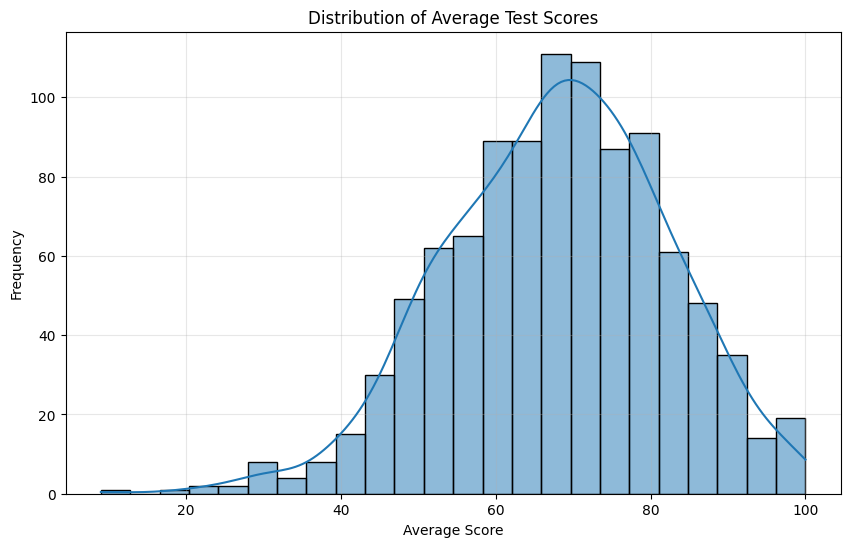

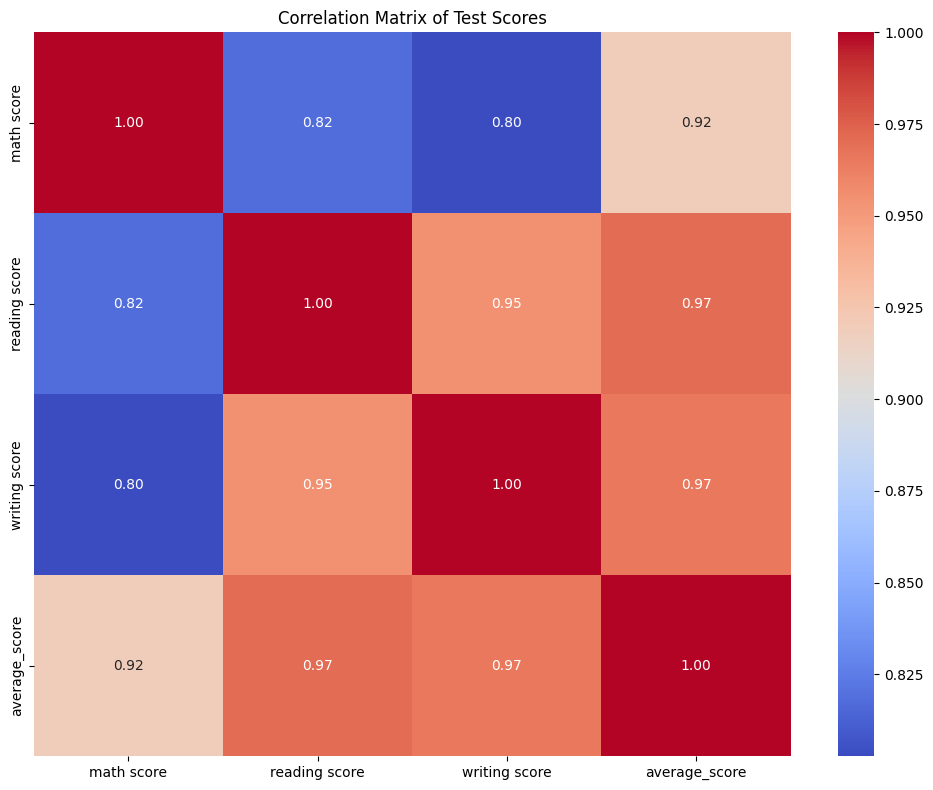

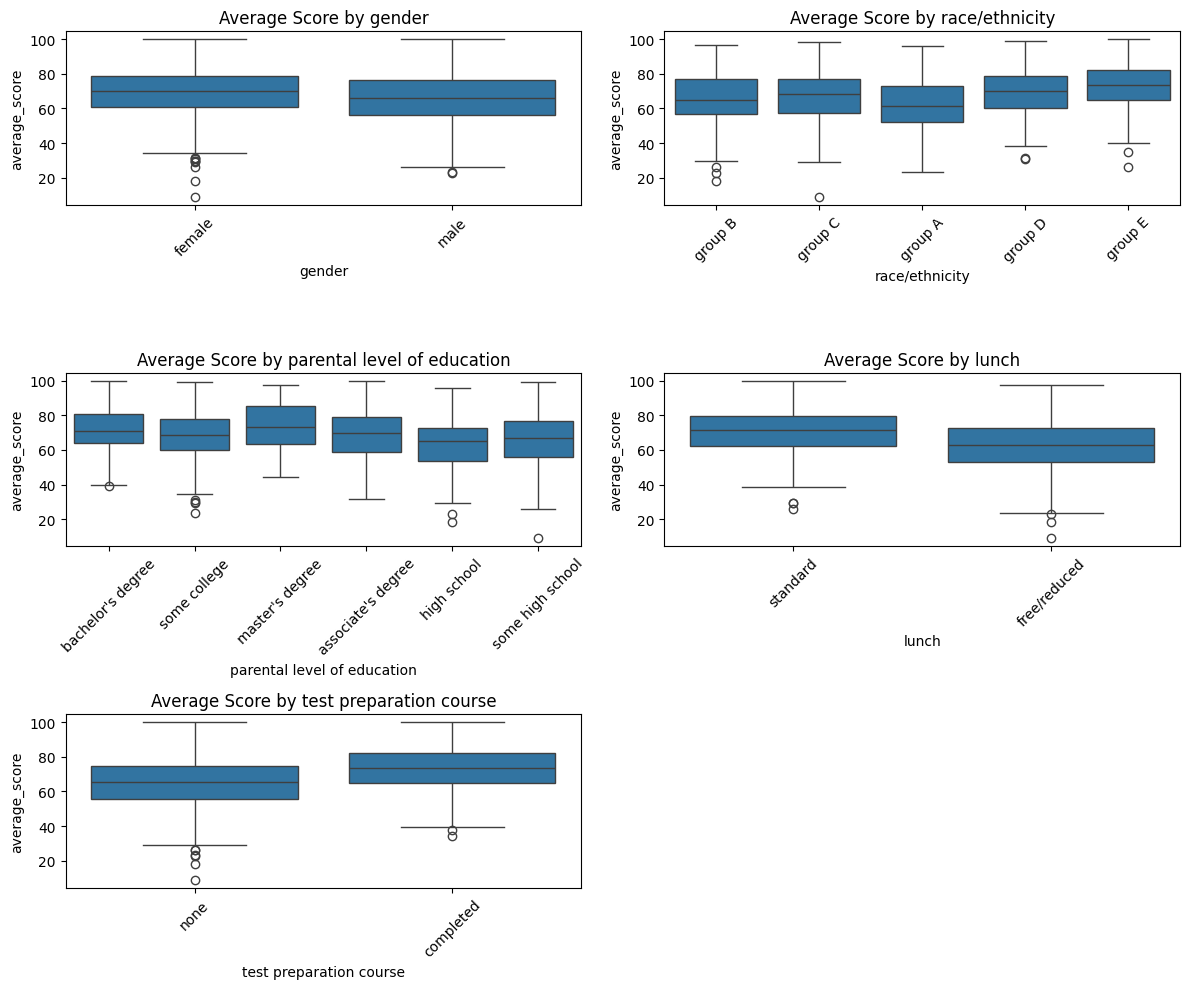

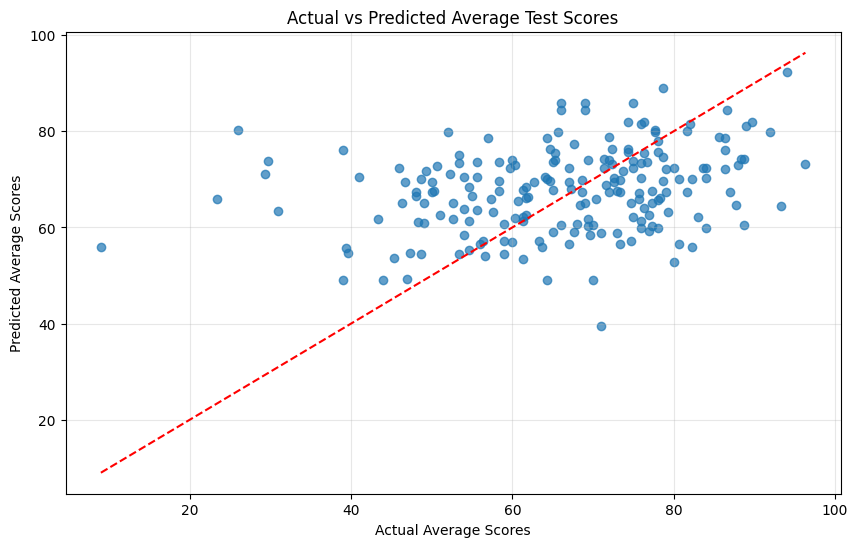

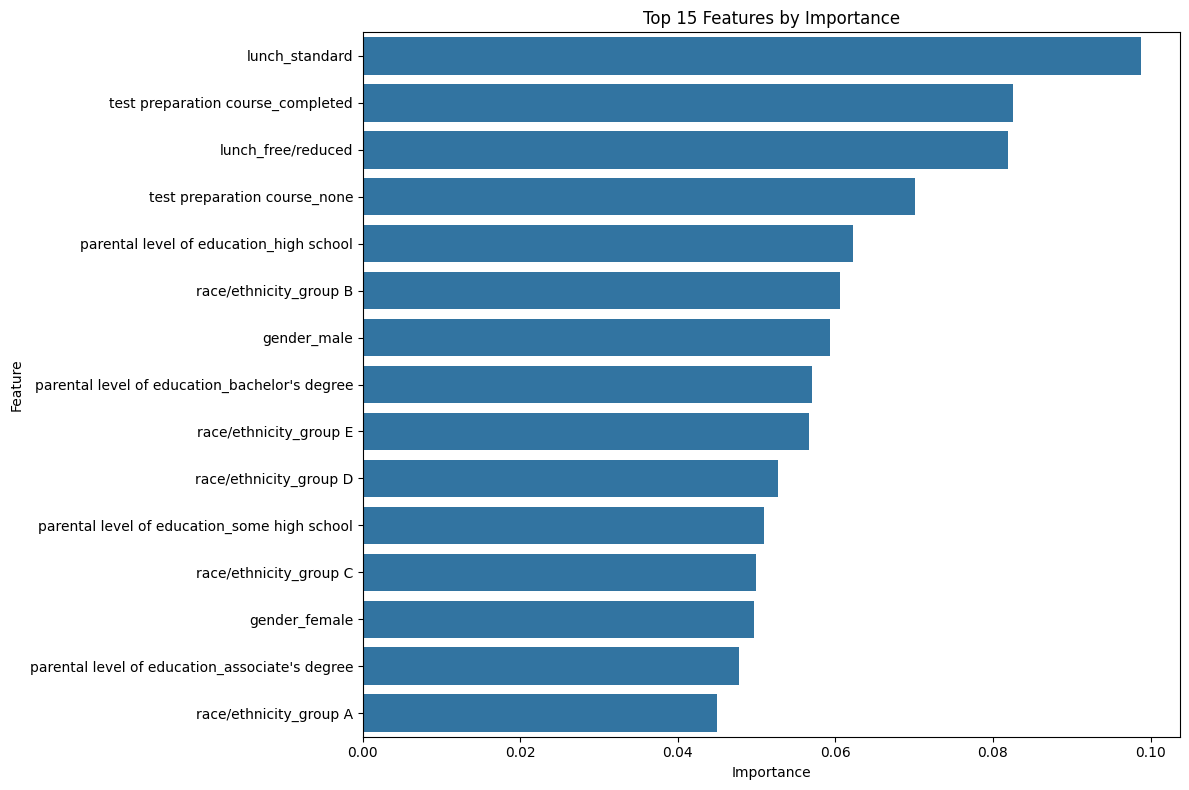

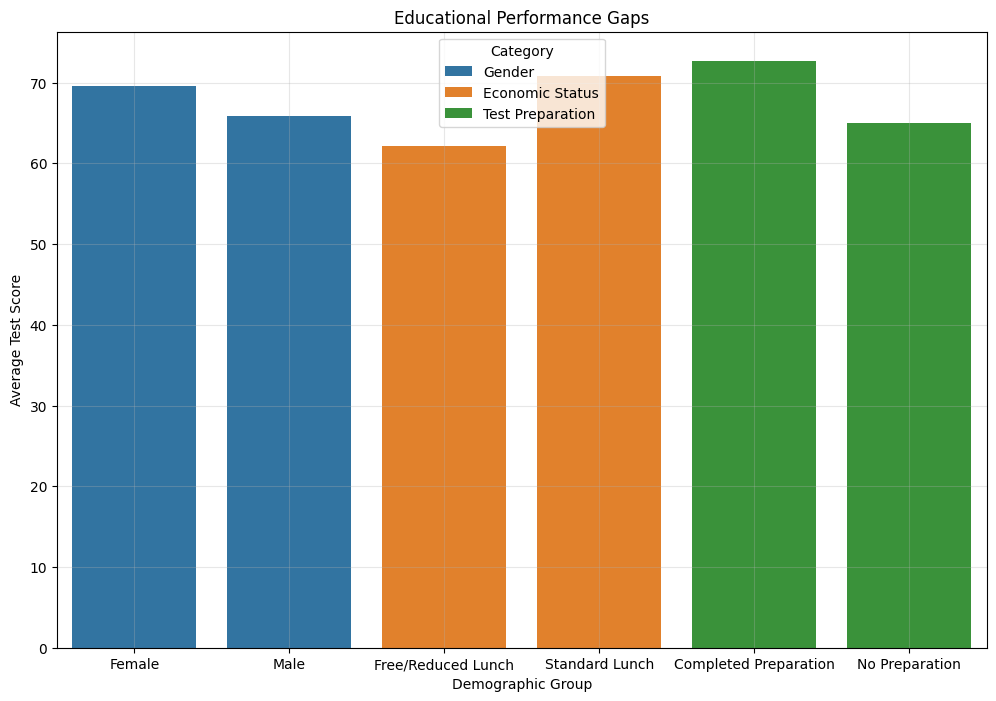

In [ ]:
# Student Grade Prediction using Random Forest Regression
# COM 431E: Data Mining and Warehousing Assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading and Exploration
print("1. LOADING AND EXPLORING THE DATASET")
print("-" * 50)

# Load the Kaggle dataset
try:
    # Try to load dataset from the project directory
    data = pd.read_csv('StudentsPerformance.csv')
    print("Successfully loaded the Kaggle 'Students Performance in Exams' dataset.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please ensure the 'StudentsPerformance.csv' file is in your project directory.")
    exit()

# Display basic information about the dataset
print(f"\nDataset shape: {data.shape}")
print(f"Number of samples: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")
print("\nColumn names in the dataset:")
print(data.columns.tolist())

print("\nFirst 5 rows of the dataset:")
print(data.head())

# Display data types and missing values
print("\nData types and missing values:")
print(data.info())

# Display summary statistics
print("\nSummary statistics:")
print(data.describe())

# 2. Data Preprocessing
print("\n2. DATA PREPROCESSING")
print("-" * 50)

# Understand the dataset structure
print("Unique values for categorical features:")
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].unique()}")

# For the Kaggle dataset, we need to create a target variable
# The dataset has three test scores: math, reading, and writing
# We'll use the average of these scores as our target variable
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3
print("\nCreated 'average_score' as the target variable (average of math, reading, and writing scores)")

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
plt.title('Distribution of Average Test Scores')
sns.histplot(data['average_score'], kde=True)
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.savefig('score_distribution.png')
print("Score distribution plot saved as 'score_distribution.png'")

# Identify categorical and numerical features
# We'll exclude the individual test scores from predictors to make the task more challenging
categorical_features = ['gender', 'race/ethnicity', 'parental level of education',
                        'lunch', 'test preparation course']
numerical_features = []  # This dataset doesn't have many numerical features besides the scores

print(f"\nCategorical features ({len(categorical_features)}):")
print(categorical_features)

print(f"\nNumerical features ({len(numerical_features)}):")
print(numerical_features)

# Define features and target
X = data[categorical_features + numerical_features]
y = data['average_score']

# Create a correlation matrix of all numeric features including target
plt.figure(figsize=(10, 8))
numeric_data = data[['math score', 'reading score', 'writing score', 'average_score']]
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Test Scores')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
print("Correlation matrix saved as 'correlation_matrix.png'")

# Explore relationships between categorical features and target
plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=feature, y='average_score', data=data)
    plt.title(f'Average Score by {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('categorical_relationships.png')
print("Categorical feature relationships saved as 'categorical_relationships.png'")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

# 3. Model Training and Evaluation
print("\n3. MODEL TRAINING AND EVALUATION")
print("-" * 50)

# Create a pipeline with preprocessing and the RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
print("Training the Random Forest Regression model...")
model.fit(X_train, y_train)
print("Model training completed!")

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Visualize actual vs predicted grades
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Average Scores')
plt.ylabel('Predicted Average Scores')
plt.title('Actual vs Predicted Average Test Scores')
plt.grid(True, alpha=0.3)
plt.savefig('actual_vs_predicted.png')
print("Actual vs Predicted plot saved as 'actual_vs_predicted.png'")

# Feature importance analysis
print("\n4. FEATURE IMPORTANCE ANALYSIS")
print("-" * 50)

# Get feature names after preprocessing
cat_encoder = preprocessor.named_transformers_['cat']
encoded_features = cat_encoder.get_feature_names_out(categorical_features)
all_features = list(encoded_features)

# Get feature importance from the Random Forest model directly
feature_importances = model.named_steps['regressor'].feature_importances_

# Create a DataFrame for feature importance
# Make sure the lengths match
if len(all_features) == len(feature_importances):
    importance_df = pd.DataFrame({
        'Feature': all_features,
        'Importance': feature_importances
    }).sort_values('Importance', ascending=False)

    # Display the top features
    top_n = min(15, len(importance_df))
    top_features = importance_df.head(top_n)
    print(f"\nTop {top_n} Most Important Features:")
    print(top_features)

    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=top_features)
    plt.title(f'Top {top_n} Features by Importance')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    print("Feature importance plot saved as 'feature_importance.png'")
else:
    print(f"Warning: Feature count mismatch. Features: {len(all_features)}, Importances: {len(feature_importances)}")

    # For debugging
    print(f"All features: {all_features}")
    print(f"Number of importance values: {len(feature_importances)}")

    # Create a simplified importance plot with just the importance values
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances)
    plt.title('Feature Importance (indices only)')
    plt.xlabel('Feature Index')
    plt.ylabel('Importance')
    plt.savefig('feature_importance_simple.png')
    print("Simple feature importance plot saved as 'feature_importance_simple.png'")

# 5. Create a feature to analyze educational gaps
print("\n5. EDUCATIONAL GAP ANALYSIS")
print("-" * 50)

# Define demographic groups for analysis
data['gender_group'] = data['gender'].map({'male': 'Male', 'female': 'Female'})
data['lunch_group'] = data['lunch'].map({'standard': 'Standard Lunch', 'free/reduced': 'Free/Reduced Lunch'})
data['prep_group'] = data['test preparation course'].map({'none': 'No Preparation', 'completed': 'Completed Preparation'})

# Create gap analysis
gap_analysis = pd.DataFrame()

# Gender gap
gender_gap = data.groupby('gender_group')['average_score'].mean().reset_index()
gender_gap.columns = ['Group', 'Average Score']
gender_gap['Category'] = 'Gender'

# Economic gap (using lunch as proxy)
lunch_gap = data.groupby('lunch_group')['average_score'].mean().reset_index()
lunch_gap.columns = ['Group', 'Average Score']
lunch_gap['Category'] = 'Economic Status'

# Preparation gap
prep_gap = data.groupby('prep_group')['average_score'].mean().reset_index()
prep_gap.columns = ['Group', 'Average Score']
prep_gap['Category'] = 'Test Preparation'

# Combine all gaps
gap_analysis = pd.concat([gender_gap, lunch_gap, prep_gap])

# Visualize educational gaps
plt.figure(figsize=(12, 8))
sns.barplot(x='Group', y='Average Score', hue='Category', data=gap_analysis)
plt.title('Educational Performance Gaps')
plt.xlabel('Demographic Group')
plt.ylabel('Average Test Score')
plt.grid(True, alpha=0.3)
plt.savefig('educational_gaps.png')
print("Educational gaps analysis saved as 'educational_gaps.png'")

# 6. Conclusion
print("\n6. CONCLUSION")
print("-" * 50)
print("The Random Forest Regression model has been successfully implemented to predict student test scores.")
print(f"The model explains {r2:.2%} of the variance in the average test scores.")
print(f"The average error in prediction is {mae:.2f} points.")
print("The model can help identify factors that contribute to student performance:")
print("1. The most important predictors have been identified through feature importance analysis.")
print("2. Educational gaps have been analyzed across gender, economic status, and test preparation.")
print("3. This information can guide targeted interventions to improve student outcomes.")

# Function to predict average score for a new student
def predict_score(student_data):
    """
    Predict a student's average test score based on their information

    Args:
        student_data: A dictionary containing student attributes

    Returns:
        Predicted average score
    """
    # Convert to DataFrame
    student_df = pd.DataFrame([student_data])

    # Make prediction
    predicted_score = model.predict(student_df)[0]
    return predicted_score

# Example usage
print("\nExample: Predicting score for a new student")
new_student = {
    'gender': 'female',
    'race/ethnicity': 'group C',
    'parental level of education': "bachelor's degree",
    'lunch': 'standard',
    'test preparation course': 'completed'
}

predicted_score = predict_score(new_student)
print(f"Predicted average test score: {predicted_score:.2f}")
print("\nThis implementation demonstrates how regression analysis can be effectively used")
print("to predict student performance and identify factors that influence academic success.")